# INVESTMENT ANALYSIS ASSIGNMENT

### Loading Datasets

In [63]:
#importing required libraries for the analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#importing the dataframes and applying encoding as palmos as there are few non alpha numerics in the data set.
companies = pd.read_csv('C:\\Users\\nithi\\OneDrive\\Desktop\\PGP\\Assignment1\\companies.csv',encoding = 'palmos')
rounds2 = pd.read_csv('C:\\Users\\nithi\\OneDrive\\Desktop\\PGP\\Assignment1\\rounds2.csv',encoding = 'palmos')

In [64]:
#checking unique companies in the rounds2 dataframe
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: str(x).lower()) #converting the company primalink to lower case to analyse
print('Unique Companies in Rounds2 Dataset =',rounds2['company_permalink'].value_counts().count())

Unique Companies in Rounds2 Dataset = 66368


In [65]:
#checking unique companies in the companies dataframe
companies['permalink'] = companies['permalink'].apply(lambda x: str(x).lower())#converting the primalink to lower case to analyse
print('Unique Companies in Companies Dataset =',companies['permalink'].value_counts().count())

Unique Companies in Companies Dataset = 66368


### Analyzing Companies Dataframe

In [66]:
companies.head(5)

permalink                    name  \
0                  /organization/-fame                   #fame   
1               /organization/-qounter                :Qounter   
2  /organization/-the-one-of-them-inc-  (THE) ONE of THEM,Inc.   
3                /organization/0-6-com                 0-6.com   
4       /organization/004-technologies        004 Technologies   

                        homepage_url  \
0                 http://livfame.com   
1             http://www.qounter.com   
2                http://oneofthem.jp   
3                 http://www.0-6.com   
4  http://004gmbh.de/en/004-interact   

                                       category_list     status country_code  \
0                                              Media  operating          IND   
1  Application Platforms|Real Time|Social Network...  operating          USA   
2                                  Apps|Games|Mobile  operating          NaN   
3                                        Curated Web  operating          CHN   
4                                           Software  operating          USA   

  state_code                 region           city  founded_at  
0         16                 Mumbai         Mumbai         NaN  
1         DE             DE - Other  Delaware City  04-09-2014  
2        NaN                    NaN            NaN         NaN  
3         22                Beijing        Beijing  01-01-2007  
4         IL  Springfield, Illinois      Champaign  01-01-2010

#### From the above dataset the permalink(which is permanant link of the company)can be a unique key for each company as there can be many companies with the same name.

In [67]:
#checking for the null values in permalink
print('The Null values present in the companies permalink column =',companies['permalink'].isnull().sum())

The Null values present in the companies permalink column = 0


### Analyzing rounds2 Dataframe

In [68]:
rounds2.head(5)

company_permalink  \
0                  /organization/-fame   
1               /organization/-qounter   
2               /organization/-qounter   
3  /organization/-the-one-of-them-inc-   
4                /organization/0-6-com   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2  /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3  /funding-round/650b8f704416801069bb178a1418776b            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   

  funding_round_code   funded_at  raised_amount_usd  
0                  B  05-01-2015         10000000.0  
1                  A  14-10-2014                NaN  
2                NaN  01-03-2014           700000.0  
3                  B  30-01-2014          3406878.0  
4                  A  19-03-2008          2000000.0

In [69]:
#checking for null values in the compnay_primalink column
print('The Null values present in the company_permalink column =',rounds2['company_permalink'].isnull().sum())

The Null values present in the company_permalink column = 0


#### Checking if there are companies which are present in rounds2 and not in companies 

In [70]:
companies_in_companies = set(companies['permalink'])
print('The Companies Which are Present in Rounds2 but not in Companies Dataset are: ')
rounds2[~(rounds2['company_permalink'].isin(companies_in_companies))]['company_permalink'].value_counts().index

The Companies Which are Present in Rounds2 but not in Companies Dataset are: 


Index([], dtype='object')

In [71]:
companies_in_rounds2 = set(rounds2['company_permalink'])
print('The Companies Which are Present in Companies but not in Rounds2 Dataset are: ')
companies[~(companies['permalink'].isin(companies_in_rounds2))]['permalink'].value_counts().index

The Companies Which are Present in Companies but not in Rounds2 Dataset are: 


Index([], dtype='object')

In [72]:
companies[~(companies['permalink'].isin(companies_in_rounds2))]['country_code'].value_counts().index

Index([], dtype='object')

#### Merging Two Datasets

In [73]:
# to ignore the above companies and make a master dataset by merging we use inner join so that only the companies that are present in both the datasets comes in.
#renaming the column name in rounds2 dataset from 'company_permalink to permalink' for merging
rounds2 = rounds2.rename(columns = {'company_permalink':'permalink'})
master_frame = pd.merge(companies,rounds2,how ='inner',on = ['permalink'])
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [74]:
master_frame

permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
2                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
...                                                   ...   
114944                          /organization/zzzzapp-com   
114945                          /organization/zzzzapp-com   
114946                               /organization/ãeron   
114947                             /organization/ã”asys-2   
114948  /organization/ä°novatiff-reklam-ve-tanä±tä±m-h...   

                                                 name            homepage_url  \
0                                               #fame      http://livfame.com   
1                                            :Qounter  http://www.qounter.com   
2                                            :Qounter  http://www.qounter.com   
3                              (THE) ONE of THEM,Inc.     http://oneofthem.jp   
4                                             0-6.com      http://www.0-6.com   
...                                               ...                     ...   
114944                          Zzzzapp Wireless ltd.  http://www.zzzzapp.com   
114945                          Zzzzapp Wireless ltd.  http://www.zzzzapp.com   
114946                                         ÃERON    http://www.aeron.hu/   
114947                                         Ã”asys    http://www.oasys.io/   
114948  Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic    http://inovatiff.com   

                                            category_list     status  \
0                                                   Media  operating   
1       Application Platforms|Real Time|Social Network...  operating   
2       Application Platforms|Real Time|Social Network...  operating   
3                                       Apps|Games|Mobile  operating   
4                                             Curated Web  operating   
...                                                   ...        ...   
114944        Advertising|Mobile|Web Development|Wireless  operating   
114945        Advertising|Mobile|Web Development|Wireless  operating   
114946                                                NaN  operating   
114947  Consumer Electronics|Internet of Things|Teleco...  operating   
114948                 Consumer Goods|E-Commerce|Internet  operating   

       country_code state_code       region           city  founded_at  \
0               IND         16       Mumbai         Mumbai         NaN   
1               USA         DE   DE - Other  Delaware City  04-09-2014   
2               USA         DE   DE - Other  Delaware City  04-09-2014   
3               NaN        NaN          NaN            NaN         NaN   
4               CHN         22      Beijing        Beijing  01-01-2007   
...             ...        ...          ...            ...         ...   
114944          HRV         15        Split          Split  13-05-2012   
114945          HRV         15        Split          Split  13-05-2012   
114946          NaN        NaN          NaN            NaN  01-01-2011   
114947          USA         CA  SF Bay Area  San Francisco  01-01-2014   
114948          NaN        NaN          NaN            NaN         NaN   

                                funding_round_permalink funding_round_type  \
0       /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1       /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
2       /funding-round/b44fbb94153f6cdef13083530bb48030               seed   
3       /funding-round/650b8f704416801069bb178a1418776b            venture   
4       /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
...                                                 ...                ...   
114944  /funding-round/8f6d25b8ee4199e5864

From the above analysis
1. We have to slice the data set based on cateory list, So there might be a chance that few missing values will be removed
2. We again have to slice the data set based on the country code, there might be a chance that again few missing values will be removed
3. We again have to slice the dataset based on the investment that spark funds are willing to invest which is 5-15 million, there might be few missing values will be removed.

So let us go ahead and slice the data set to a required amount and check for null values and the ways of treating them.

In [75]:
master_frame['status'].value_counts()

operating    90153
acquired     11745
closed        8725
ipo           4326
Name: status, dtype: int64

#### Considering Spark Funds cannot invest in Closed companies. So, removing the rows of which companies are in closed status

In [76]:
master_frame = master_frame[master_frame['status']!= 'closed']
master_frame.isnull().sum()

permalink                      0
name                           0
homepage_url                5314
category_list               2385
status                         0
country_code                6831
state_code                  8937
region                      8197
city                        8194
founded_at                 17844
funding_round_permalink        0
funding_round_type             0
funding_round_code         77270
funded_at                      0
raised_amount_usd          18321
dtype: int64

#### Analyzing the Funding type in Master_Frame

In [77]:
master_frame['funding_round_type'].value_counts()

venture                  51463
seed                     27902
debt_financing            6460
angel                     5376
undisclosed               4597
equity_crowdfunding       3180
private_equity            2103
grant                     2039
convertible_note          1725
post_ipo_equity            579
product_crowdfunding       390
non_equity_assistance      182
post_ipo_debt              139
secondary_market            89
Name: funding_round_type, dtype: int64

#### Analysing the VENTURE Funding type

In [78]:
print('The top5 raised amount in USD for funding type VENTURE are:')
print(master_frame[master_frame['funding_round_type'] == 'venture']['raised_amount_usd'].value_counts().head())
print('----------------------------------------------------')
print('The Quartile ranges and median values for funding type VENTURE are:')
print(master_frame[master_frame['funding_round_type'] == 'venture']['raised_amount_usd'].describe())
print('----------------------------------------------------')
print('Count of funding type is Venture where the raised amount matches with the range of Spark Funds investment:',master_frame[(master_frame['funding_round_type'] == 'venture') & (master_frame['raised_amount_usd'] >=5000000) & (master_frame['raised_amount_usd'] <=15000000)]['raised_amount_usd'].value_counts().sum())
print('Sum of raised amount of Venture type :',master_frame[(master_frame['funding_round_type'] == 'venture')]['raised_amount_usd'].sum())

The top5 raised amount in USD for funding type VENTURE are:
10000000.0    1697
5000000.0     1573
2000000.0     1126
3000000.0     1118
15000000.0    1027
Name: raised_amount_usd, dtype: int64
----------------------------------------------------
The Quartile ranges and median values for funding type VENTURE are:
count    4.664100e+04
mean     1.189560e+07
std      8.935104e+07
min      0.000000e+00
25%      1.634000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64
----------------------------------------------------
Count of funding type is Venture where the raised amount matches with the range of Spark Funds investment: 15436
Sum of raised amount of Venture type : 554822839010.0


#### Analysing the SEED Funding type

In [79]:
print('The top5 raised amount in USD for funding type SEED are:')
print(master_frame[master_frame['funding_round_type'] == 'seed']['raised_amount_usd'].value_counts().head(3))
print('----------------------------------------------------')
print('The Quartile ranges and median values for funding type SEED are:')
print(master_frame[master_frame['funding_round_type'] == 'seed']['raised_amount_usd'].describe())
print('----------------------------------------------------')
print('Count of funding type is SEED where the raised amount matches with the range of Spark Funds investment:',master_frame[(master_frame['funding_round_type'] == 'seed') & (master_frame['raised_amount_usd'] >=5000000) & (master_frame['raised_amount_usd'] <=15000000)]['raised_amount_usd'].value_counts().sum())
print('Sum of raised amount of Seed type :',master_frame[(master_frame['funding_round_type'] == 'seed')]['raised_amount_usd'].sum())

The top5 raised amount in USD for funding type SEED are:
1000000.0    988
100000.0     871
500000.0     852
Name: raised_amount_usd, dtype: int64
----------------------------------------------------
The Quartile ranges and median values for funding type SEED are:
count    2.174900e+04
mean     7.385902e+05
std      2.280015e+06
min      0.000000e+00
25%      6.000000e+04
50%      3.000000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64
----------------------------------------------------
Count of funding type is SEED where the raised amount matches with the range of Spark Funds investment: 197
Sum of raised amount of Seed type : 16063598753.0


#### Analysing the PRIVATE EQUITY Funding type

In [80]:
print('The top5 raised amount in USD for funding type PRIVATE EQUITY are:')
print(master_frame[master_frame['funding_round_type'] == 'private_equity']['raised_amount_usd'].value_counts().head(3))
print('----------------------------------------------------')
print('The Quartile ranges and median values for funding type PRIVATE EQUITY are:')
print(master_frame[master_frame['funding_round_type'] == 'private_equity']['raised_amount_usd'].describe())
print('----------------------------------------------------')
print('Count of funding type is PRIVATE EQUITY where the raised amount matches with the range of Spark Funds investment:',master_frame[(master_frame['funding_round_type'] == 'private_equity') & (master_frame['raised_amount_usd'] >=5000000) & (master_frame['raised_amount_usd'] <=15000000)]['raised_amount_usd'].value_counts().sum())
print('Sum of raised amount of PRIVATE EQUITY type :',master_frame[(master_frame['funding_round_type'] == 'private_equity')]['raised_amount_usd'].sum())

The top5 raised amount in USD for funding type PRIVATE EQUITY are:
100000000.0    62
50000000.0     42
10000000.0     40
Name: raised_amount_usd, dtype: int64
----------------------------------------------------
The Quartile ranges and median values for funding type PRIVATE EQUITY are:
count    1.806000e+03
mean     7.557581e+07
std      2.040155e+08
min      0.000000e+00
25%      5.270000e+06
50%      2.000000e+07
75%      7.594064e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64
----------------------------------------------------
Count of funding type is PRIVATE EQUITY where the raised amount matches with the range of Spark Funds investment: 400
Sum of raised amount of PRIVATE EQUITY type : 136489908405.0


#### Analysing the ANGEL Funding type

In [81]:
print('The top5 raised amount in USD for funding type ANGEL are:')
print(master_frame[master_frame['funding_round_type'] == 'angel']['raised_amount_usd'].value_counts().head(3))
print('----------------------------------------------------')
print('The Quartile ranges and median values for funding type ANGEL are:')
print(master_frame[master_frame['funding_round_type'] == 'angel']['raised_amount_usd'].describe())
print('----------------------------------------------------')
print('Count of funding type is ANGEL where the raised amount matches with the range of Spark Funds investment:',master_frame[(master_frame['funding_round_type'] == 'angel') & (master_frame['raised_amount_usd'] >=5000000) & (master_frame['raised_amount_usd'] <=15000000)]['raised_amount_usd'].value_counts().sum())
print('Sum of raised amount of ANGEL type :',master_frame[(master_frame['funding_round_type'] == 'angel')]['raised_amount_usd'].sum())

The top5 raised amount in USD for funding type ANGEL are:
500000.0     242
1000000.0    239
100000.0     213
Name: raised_amount_usd, dtype: int64
----------------------------------------------------
The Quartile ranges and median values for funding type ANGEL are:
count    4.305000e+03
mean     9.799154e+05
std      7.824931e+06
min      0.000000e+00
25%      1.528420e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64
----------------------------------------------------
Count of funding type is ANGEL where the raised amount matches with the range of Spark Funds investment: 66
Sum of raised amount of ANGEL type : 4218535622.0


In [82]:
New_frame = master_frame[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)]
import plotly.express as px
fig = px.pie(New_frame, values='raised_amount_usd', names='funding_round_type', title='Total amount of Funding across types')
fig.show()

(0.0, 2000.0)

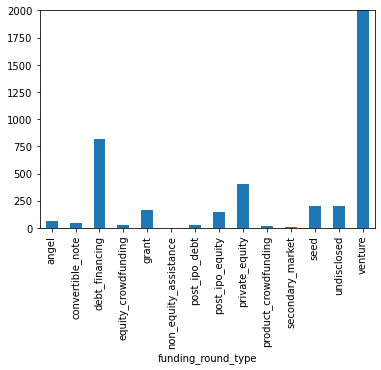

In [83]:
master_frame[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)].groupby(['funding_round_type'])['raised_amount_usd'].count().plot.bar()
plt.ylim(0,2000)

<AxesSubplot:title={'center':'mean of amount funded accross types'}, xlabel='funding_round_type'>

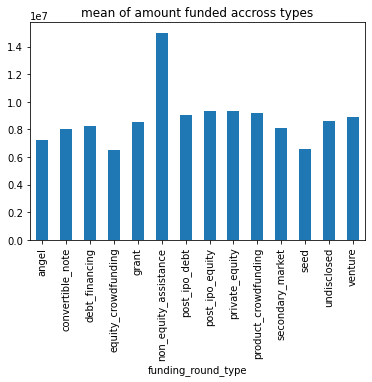

In [84]:
master_frame[(master_frame['raised_amount_usd'] >= 5000000) & (master_frame['raised_amount_usd'] <= 15000000)].groupby(['funding_round_type'])['raised_amount_usd'].mean().plot.bar(title = 'mean of amount funded accross types')


From the above Analysis we can see that the most of the fundings that are in range 5 million to 15 million is of type Venture. Hence we remove all the records other than funding type Venture for the further analysis.

In [85]:
#master frame is now taken where the funding type is venture.
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']
master_frame

permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
3                     /organization/-the-one-of-them-inc-   
4                                   /organization/0-6-com   
5                          /organization/004-technologies   
...                                                   ...   
114934                                /organization/zyrra   
114936                               /organization/zystor   
114937                           /organization/zytoprotec   
114941  /organization/zznode-science-and-technology-co...   
114946                               /organization/ãeron   

                                 name                       homepage_url  \
0                               #fame                 http://livfame.com   
1                            :Qounter             http://www.qounter.com   
3              (THE) ONE of THEM,Inc.                http://oneofthem.jp   
4                             0-6.com                 http://www.0-6.com   
5                    004 Technologies  http://004gmbh.de/en/004-interact   
...                               ...                                ...   
114934                          Zyrra               http://www.zyrra.com   
114936                         Zystor              http://www.zystor.com   
114937                     Zytoprotec          http://www.zytoprotec.com   
114941  ZZNode Science and Technology              http://www.zznode.com   
114946                         ÃERON               http://www.aeron.hu/   

                                            category_list     status  \
0                                                   Media  operating   
1       Application Platforms|Real Time|Social Network...  operating   
3                                       Apps|Games|Mobile  operating   
4                                             Curated Web  operating   
5                                                Software  operating   
...                                                   ...        ...   
114934                                         E-Commerce  operating   
114936                                      Biotechnology   acquired   
114937                                      Biotechnology  operating   
114941                                Enterprise Software  operating   
114946                                                NaN  operating   

       country_code state_code                 region                city  \
0               IND         16                 Mumbai              Mumbai   
1               USA         DE             DE - Other       Delaware City   
3               NaN        NaN                    NaN                 NaN   
4               CHN         22                Beijing             Beijing   
5               USA         IL  Springfield, Illinois           Champaign   
...             ...        ...                    ...                 ...   
114934          USA         MA                 Boston           Cambridge   
114936          USA         WI              Milwaukee           Milwaukee   
114937          AUT          3                 Vienna  Gerasdorf Bei Wien   
114941          CHN         22                Beijing             Beijing   
114946          NaN        NaN                    NaN                 NaN   

        founded_at                          funding_round_permalink  \
0              NaN  /funding-round/9a01d05418af9f794eebff7ace91f638   
1       04-09-2014  /funding-round/22dacff496eb7acb2b901dec1dfe5633   
3              NaN  /funding-round/650b8f704416801069bb178a1418776b   
4       01-01-2007  /funding-round/5727accaeaa57461bd22a9bdd945382d   
5       01-01-2010  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830   
...            ...                                              ...   
114934         NaN  /funding-round/7a0fa791c96c9c447ee54662395beab9   
114936         NaN  /funding-round/7ea37c0ff

#### Listing down the top 9 countries which raised the highest amount under the type VENTURE

In [86]:
List_of_top9 = list(master_frame.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending = False).head(9).index)
List_of_top9

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']

In [87]:
top9 = master_frame[master_frame['country_code'].isin(List_of_top9)] #slicing the master frame to top 9 countries
top9

permalink  \
0                                     /organization/-fame   
1                                  /organization/-qounter   
4                                   /organization/0-6-com   
5                          /organization/004-technologies   
8                     /organization/0ndine-biomedical-inc   
...                                                   ...   
114922                           /organization/zyomyx-inc   
114923                           /organization/zyomyx-inc   
114934                                /organization/zyrra   
114936                               /organization/zystor   
114941  /organization/zznode-science-and-technology-co...   

                                 name                       homepage_url  \
0                               #fame                 http://livfame.com   
1                            :Qounter             http://www.qounter.com   
4                             0-6.com                 http://www.0-6.com   
5                    004 Technologies  http://004gmbh.de/en/004-interact   
8              Ondine Biomedical Inc.               http://ondinebio.com   
...                               ...                                ...   
114922                         ZYOMYX              http://www.zyomyx.com   
114923                         ZYOMYX              http://www.zyomyx.com   
114934                          Zyrra               http://www.zyrra.com   
114936                         Zystor              http://www.zystor.com   
114941  ZZNode Science and Technology              http://www.zznode.com   

                                            category_list     status  \
0                                                   Media  operating   
1       Application Platforms|Real Time|Social Network...  operating   
4                                             Curated Web  operating   
5                                                Software  operating   
8                                           Biotechnology  operating   
...                                                   ...        ...   
114922                                      Biotechnology  operating   
114923                                      Biotechnology  operating   
114934                                         E-Commerce  operating   
114936                                      Biotechnology   acquired   
114941                                Enterprise Software  operating   

       country_code state_code                 region           city  \
0               IND         16                 Mumbai         Mumbai   
1               USA         DE             DE - Other  Delaware City   
4               CHN         22                Beijing        Beijing   
5               USA         IL  Springfield, Illinois      Champaign   
8               CAN         BC              Vancouver      Vancouver   
...             ...        ...                    ...            ...   
114922          USA         MO             MO - Other        Fremont   
114923          USA         MO             MO - Other        Fremont   
114934          USA         MA                 Boston      Cambridge   
114936          USA         WI              Milwaukee      Milwaukee   
114941          CHN         22                Beijing        Beijing   

        founded_at                          funding_round_permalink  \
0              NaN  /funding-round/9a01d05418af9f794eebff7ace91f638   
1       04-09-2014  /funding-round/22dacff496eb7acb2b901dec1dfe5633   
4       01-01-2007  /funding-round/5727accaeaa57461bd22a9bdd945382d   
5       01-01-2010  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830   
8       01-01-1997  /funding-round/954b9499724b946ad8c396a57a5f3b72   
...            ...                                              ...   
114922  01-01-1998  /funding-round/b4fce7f8a13267353d57db09099800e8   
114923  01-01-1998  /funding-round/ea5b21da6cf999ff4d5667431fe318d7   
114934         NaN  /funding-roun

In [88]:
import plotly.express as px
fig = px.pie(top9, values='raised_amount_usd', names='country_code', title='Funding across countries')
fig.show()

From the top9 countries we divide it to top3 where top3 are USA, GBR and IND(Considering English is not primary but official Language)

In [89]:
List_top3 = ['USA','GBR','IND']
top3 = master_frame[master_frame['country_code'].isin(List_top3)] #slicing the master_frame to top3 countries
top3

permalink              name  \
0                  /organization/-fame             #fame   
1               /organization/-qounter          :Qounter   
5       /organization/004-technologies  004 Technologies   
10                /organization/0xdata            H2O.ai   
11                /organization/0xdata            H2O.ai   
...                                ...               ...   
114920        /organization/zyomyx-inc            ZYOMYX   
114922        /organization/zyomyx-inc            ZYOMYX   
114923        /organization/zyomyx-inc            ZYOMYX   
114934             /organization/zyrra             Zyrra   
114936            /organization/zystor            Zystor   

                             homepage_url  \
0                      http://livfame.com   
1                  http://www.qounter.com   
5       http://004gmbh.de/en/004-interact   
10                         http://h2o.ai/   
11                         http://h2o.ai/   
...                                   ...   
114920              http://www.zyomyx.com   
114922              http://www.zyomyx.com   
114923              http://www.zyomyx.com   
114934               http://www.zyrra.com   
114936              http://www.zystor.com   

                                            category_list     status  \
0                                                   Media  operating   
1       Application Platforms|Real Time|Social Network...  operating   
5                                                Software  operating   
10                                              Analytics  operating   
11                                              Analytics  operating   
...                                                   ...        ...   
114920                                      Biotechnology  operating   
114922                                      Biotechnology  operating   
114923                                      Biotechnology  operating   
114934                                         E-Commerce  operating   
114936                                      Biotechnology   acquired   

       country_code state_code                 region           city  \
0               IND         16                 Mumbai         Mumbai   
1               USA         DE             DE - Other  Delaware City   
5               USA         IL  Springfield, Illinois      Champaign   
10              USA         CA            SF Bay Area  Mountain View   
11              USA         CA            SF Bay Area  Mountain View   
...             ...        ...                    ...            ...   
114920          USA         MO             MO - Other        Fremont   
114922          USA         MO             MO - Other        Fremont   
114923          USA         MO             MO - Other        Fremont   
114934          USA         MA                 Boston      Cambridge   
114936          USA         WI              Milwaukee      Milwaukee   

        founded_at                          funding_round_permalink  \
0              NaN  /funding-round/9a01d05418af9f794eebff7ace91f638   
1       04-09-2014  /funding-round/22dacff496eb7acb2b901dec1dfe5633   
5       01-01-2010  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830   
10      01-01-2011  /funding-round/3bb2ee4a2d89251a10aaa735b1180e44   
11      01-01-2011  /funding-round/ae2a174c06517c2394aed45006322a7e   
...            ...                                              ...   
114920  01-01-1998  /funding-round/4191cb5258d3863b0212d1083881da64   
114922  01-01-1998  /funding-round/b4fce7f8a13267353d57db09099800e8   
114923  01-01-1998  /funding-round/ea5b21da6cf999ff4d5667431fe318d7   
114934         NaN  /funding-round/7a0fa791c96c9c447ee54662395beab9   
114936         NaN  /funding-round/7ea37c0ff4132b084832039a9380d34e   

       funding_round_type funding_round_code   funded_at  raised_amount_usd  
0                 venture                  B  05-01-2015         10000000.0  
1                 venture   

#### Importing Mapping dataframe and applying some functions.

In [90]:
mapping = pd.read_csv('C:\\Users\\nithi\\OneDrive\\Desktop\\PGP\\Assignment1\\mapping.csv') #importing mapping dataset
mapping['Main Sector'] = pd.get_dummies(mapping).idxmax(1) #reversing onehotencoding
mapping = pd.DataFrame(mapping,columns = ['category_list','Main Sector']) #Removing the one hot encoded columns from the data frame
mapping['category_list'] = mapping['category_list'].apply(lambda x : str(x).lower()) #Converting the category_list to lower case to join this dataframe with top3
#There is an observation that in few of the category_list '0' is printed instead of 'na', But except enterprise 2.0 rest need to be changed.
mapping['category_list'] = mapping['category_list'].apply(lambda x : x.replace('0','na') if x!= 'enterprise 2.0' else x)
mapping

category_list                              Main Sector
0                 nan                                   Blanks
1                  3d                            Manufacturing
2         3d printing                            Manufacturing
3       3d technology                            Manufacturing
4          accounting  Social, Finance, Analytics, Advertising
..                ...                                      ...
683         wholesale                                   Others
684  wine and spirits                            Entertainment
685          wireless                            Entertainment
686             women                                   Others
687      young adults                                   Others

[688 rows x 2 columns]

The category_list in the master_frame has multiple categories seperated by "|", As per the Sources it is good to take the first part in that coloumn

In [91]:
top3['category_list'] = top3['category_list'].apply(lambda x:((str(x).split('|'))[0]).lower()) #splitting where | is present and then taking first part of the list
top3['country_code'].value_counts()

USA    35829
GBR     2133
IND      961
Name: country_code, dtype: int64

#### Merging top3 and Mapping data sets to get the Main sector column in the top3 data frame and named it master_frame_top3

In [92]:
master_frame_top3 = pd.merge(top3,mapping,how ='left',on = ['category_list'])
master_frame_top3[master_frame_top3['Main Sector'].isnull()]#checking the columns where the 'Main Sector' column is not mapped with any with the mapping Data frame.

permalink                     name  \
7291   /organization/clean-vehicle-solutions  Clean Vehicle Solutions   
10100  /organization/dolores-speech-products  Dolores Speech Products   
12555               /organization/five-below               Five Below   
14890               /organization/healthtell               HealthTell   
17844               /organization/justinmind               Justinmind   
30036          /organization/sense-labs-inc-                    Sense   
35990                 /organization/velocomp                 Velocomp   

                           homepage_url                    category_list  \
7291   http://cleanvehiclesolutions.com                 natural gas uses   
10100  http://doloresspeechproducts.com               adaptive equipment   
12555          http://www.fivebelow.com                 specialty retail   
14890         http://www.healthtell.com  biotechnology and semiconductor   
17844         http://www.justinmind.com                rapidly expanding   
30036                 http://sense.com/                        greentech   
35990                               NaN               adaptive equipment   

          status country_code state_code        region            city  \
7291   operating          USA         NJ        Newark  East Brunswick   
10100  operating          USA         MA        Boston       Wellesley   
12555        ipo          USA         PA  Philadelphia    Philadelphia   
14890  operating          USA         CA   SF Bay Area       San Ramon   
17844  operating          USA         CA   SF Bay Area   San Francisco   
30036  operating          USA         MA        Boston       Cambridge   
35990  operating          USA         FL  Palm Beaches      Boca Raton   

       founded_at                          funding_round_permalink  \
7291          NaN  /funding-round/7b991c526219c2edff8789942215d93b   
10100         NaN  /funding-round/ba7393d89b2a5ad0c076e2295794c4ce   
12555         NaN  /funding-round/2a50c59492585ea4080fa67de755a442   
14890  01-01-2010  /funding-round/8edf7332fface9972541807a248690b3   
17844  01-01-2007  /funding-round/c6e9adcef86247dccf8418dc3e4b9a0b   
30036  01-01-2013  /funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2   
35990         NaN  /funding-round/2cdceb89206aad240a78e58329cec171   

      funding_round_type funding_round_code   funded_at  raised_amount_usd  \
7291             venture                NaN  26-02-2010           125000.0   
10100            venture                NaN  07-04-2015           250000.0   
12555            venture                NaN  14-10-2010        194000000.0   
14890            venture                  A  13-06-2014          9486929.0   
17844            venture                  A  17-12-2007           862000.0   
30036            venture                NaN  29-12-2014          2499999.0   
35990            venture                NaN  09-09-2011          1420000.0   

      Main Sector  
7291          NaN  
10100         NaN  
12555         NaN  
14890         NaN  
17844         NaN  
30036         NaN  
35990         NaN

### Analyzing the above 7 rows one by one to know to which Main Sector those belongs to.

#### Gone through 7 rows and assigned its Main Sector based on three logics: 1. Personal understanding of the Category,             2. Checking the second Main sector after the " | " in the category_list. 3. If none worked out, considering its main sector as others.

In [93]:
#Assignment Done where the permalink of the organization is present and Master Sector is null value in all the 11 rows.
master_frame_top3.loc[(master_frame_top3['permalink']== '/organization/healthtell') & (master_frame_top3['Main Sector'].isnull()),'Main Sector'] = 'Health'
master_frame_top3.loc[(master_frame_top3['permalink']== '/organization/dolores-speech-products') & (master_frame_top3['Main Sector'].isnull()),'Main Sector'] = 'Social, Finance, Analytics, Advertising'
master_frame_top3.loc[(master_frame_top3['permalink']== '/organization/five-below') & (master_frame_top3['Main Sector'].isnull()),'Main Sector'] = 'Health'
master_frame_top3.loc[(master_frame_top3['permalink']== '/organization/velocomp') & (master_frame_top3['Main Sector'].isnull()),'Main Sector'] = 'Automotive & Sports'
master_frame_top3.loc[master_frame_top3['Main Sector'].isnull(),'Main Sector'] = 'Others'
master_frame_top3[master_frame_top3['Main Sector'].isnull()]

Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd, Main Sector]
Index: []

Value_counts of each Sector type which recieved more investments.

In [94]:
master_frame_top3['Main Sector'].value_counts()
sectors_top3 = list(master_frame_top3['Main Sector'].value_counts().head(3).index)
sectors_top3

['Others',
 'Cleantech / Semiconductors',
 'Social, Finance, Analytics, Advertising']

In [95]:
import plotly.express as px
top_3_sectors = master_frame_top3[(master_frame_top3['Main Sector'].isin(sectors_top3))]
top_3_sectors = top_3_sectors[(top_3_sectors['raised_amount_usd']>=5000000) & (top_3_sectors['raised_amount_usd']<=15000000)]
fig = px.bar(top_3_sectors, x="country_code", y="raised_amount_usd", color="Main Sector", barmode="group",template = 'none')
fig.show()
#top_3_sectors = master_frame_top3[master_frame_top3['Main Sector'].isin(sectors_top3)]
#top_3_sectors.pivot_table(index='country_code', columns='Main Sector', aggfunc='size').plot.bar(stacked=True,figsize = (12,11))

### Splitting the Master list top3 based on Countries

#### This contains the data where Country is USA

In [96]:
df1 = master_frame_top3[(master_frame_top3['country_code'] == 'USA')] #creating new data frame
df1 = df1[~ df1['raised_amount_usd'].isnull()] #removing the rows where Raised amount is null, it is impossible to fill the null values in there.
df1['raised_amount_usd'].astype(float) #Converting the raised amount coloumn to float variable.
df1 = df1[(df1['raised_amount_usd']>=5000000)&(df1['raised_amount_usd']<=15000000)] #Splitting the dataframe to the required raised amount range in which spark funds are interested in
df1.isnull().sum()

permalink                     0
name                          0
homepage_url                530
category_list                 0
status                        0
country_code                  0
state_code                    1
region                        7
city                          7
founded_at                 1485
funding_round_permalink       0
funding_round_type            0
funding_round_code         3224
funded_at                     0
raised_amount_usd             0
Main Sector                   0
dtype: int64

In [97]:
df1[df1['state_code'].isnull()]

permalink     name                      homepage_url  \
20244  /organization/matific  Matific  https://www.matific.com/us/en-us   

      category_list     status country_code state_code region city founded_at  \
20244     education  operating          USA        NaN    NaN  NaN        NaN   

                               funding_round_permalink funding_round_type  \
20244  /funding-round/bca93515433601ab044dfa167c050a35            venture   

      funding_round_code   funded_at  raised_amount_usd Main Sector  
20244                  A  21-01-2015         12000000.0      Others

In [98]:
df1[df1['region'].isnull()]

permalink                      name  \
5107                    /organization/boombox                   Boombox   
8082                    /organization/comviva                   Comviva   
10459  /organization/earthstone-international  Earthstone International   
13352           /organization/ganeden-biotech           Ganeden Biotech   
20244                   /organization/matific                   Matific   
34190                     /organization/thngy                  EVRYTHNG   
34191                     /organization/thngy                  EVRYTHNG   

                                   homepage_url          category_list  \
5107                    https://www.boombox.com  advertising platforms   
8082                     http://www.comviva.com                 mobile   
10459  https://www.earthstoneinternational.com/          manufacturing   
13352         http://www.ganedenprobiotics.com/          biotechnology   
20244          https://www.matific.com/us/en-us              education   
34190                       http://Evrythng.com               big data   
34191                       http://Evrythng.com               big data   

          status country_code state_code region city  founded_at  \
5107   operating          USA         UT    NaN  NaN  01-07-2015   
8082   operating          USA         IN    NaN  NaN         NaN   
10459  operating          USA         NM    NaN  NaN         NaN   
13352  operating          USA         OH    NaN  NaN  01-01-1997   
20244  operating          USA        NaN    NaN  NaN         NaN   
34190  operating          USA         NY    NaN  NaN  01-01-2011   
34191  operating          USA         NY    NaN  NaN  01-01-2011   

                               funding_round_permalink funding_round_type  \
5107   /funding-round/76aa68c1fa88d5d57407cf2ad546aead            venture   
8082   /funding-round/cc1eccff287c2243c2df2159bce81c72            venture   
10459  /funding-round/b772e5a1576775967aea02cf22d361f2            venture   
13352  /funding-round/52e1960acc1bd39efba4cc62a192a761            venture   
20244  /funding-round/bca93515433601ab044dfa167c050a35            venture   
34190  /funding-round/32417c086b948597c4f6571592c4af18            venture   
34191  /funding-round/d5d872ab4182ea45ea34196d5ef2919d            venture   

      funding_round_code   funded_at  raised_amount_usd  \
5107                   A  23-10-2015          5500000.0   
8082                   A  04-12-2005         13500000.0   
10459                NaN  21-05-2004          9000000.0   
13352                NaN  05-11-2007         12000000.0   
20244                  A  21-01-2015         12000000.0   
34190                  B  10-06-2015          7500000.0   
34191                  A  30-04-2014          7000000.0   

                                   Main Sector  
5107   Social, Finance, Analytics, Advertising  
8082                News, Search and Messaging  
10459                            Manufacturing  
13352               Cleantech / Semiconductors  
20244                                   Others  
34190  Social, Finance, Analytics, Advertising  
34191  Social, Finance, Analytics, Advertising

From the above data We can see founded_at and funding_round_code have null values, I decided to keep it that way as they are not necessary for the analysis. State Code, Region and City has null Values as well, Spark Funds can get the details using permalink or the homepage URLs, so I decided to keep it as it is.

Printing the required items that are necessary for Analysis for USA based investments

In [120]:
print('Total number of investments',df1[~df1['raised_amount_usd'].isnull()]['raised_amount_usd'].count())
print('\nTotal amount of investment (USD)', df1['raised_amount_usd'].sum())
print('\nTop three sectors based on count of investments are :')
print(df1['Main Sector'].value_counts().head(3))
print('\nThe details of the Organization which received the highest Investment in USA in Others Category:')
print(df1[df1['Main Sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))
print('\nThe details of the Organization which received the highest Investment in USA in Social, Finance, Analytics, Advertising Category:\n')
print(df1[df1['Main Sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

Total number of investments 11344

Total amount of investment (USD) 101545266754.0

Top three sectors based on count of investments are :
Others                                     2758
Social, Finance, Analytics, Advertising    2590
Cleantech / Semiconductors                 2192
Name: Main Sector, dtype: int64

The details of the Organization which received the highest Investment in USA in Others Category:
name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

The details of the Organization which received the highest Investment in USA in Social, Finance, Analytics, Advertising Category:

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64


#### This contains the data where Country is GBR

In [121]:
df2 = master_frame_top3[master_frame_top3['country_code'] == 'GBR']#creating new data frame
df2 = df2[~ df2['raised_amount_usd'].isnull()]#removing the rows where Raised amount is null, it is impossible to fill the null values in there.
df2['raised_amount_usd'].astype(int)#Converting the raised amount coloumn to float variable.
df2 = df2[(df2['raised_amount_usd']>=5000000)&(df2['raised_amount_usd']<=15000000)]#Splitting the dataframe to the required raised amount range in which spark funds are interested in

In [122]:
df2[df2['state_code'].isnull()]

permalink                      name  \
1133             /organization/aea-technology            AEA Technology   
13398            /organization/gear4music-com            Gear4music.com   
15891  /organization/immune-targeting-systems  Immune Targeting Systems   
15892  /organization/immune-targeting-systems  Immune Targeting Systems   
20044                  /organization/manomasa                  Manomasa   
20708                   /organization/menlook                   Menlook   
21493             /organization/moda-in-pelle             Moda in Pelle   
21609  /organization/molecular-products-group  Molecular Products Group   
25702    /organization/phosphate-therapeutics    Phosphate Therapeutics   
27284               /organization/purple-wifi               Purple WiFi   
28141                    /organization/redeem                    Redeem   
32600                 /organization/streetcar                 Streetcar   

                            homepage_url             category_list     status  \
1133               http://www.aeat.co.uk          clean technology   acquired   
13398          http://www.gear4music.com                e-commerce  operating   
15891      http://www.its-innovation.com             biotechnology   acquired   
15892      http://www.its-innovation.com             biotechnology   acquired   
20044              http://manomasa.co.uk             manufacturing  operating   
20708             http://www.menlook.com            consumer goods  operating   
21493        http://www.modainpelle.com/                    retail  operating   
21609  http://www.molecularproducts.com/               health care  operating   
25702      http://shieldtherapeutics.com             biotechnology  operating   
27284         http://www.purplewifi.net/                    mobile  operating   
28141           http://www.redeem.co.uk/  environmental innovation  operating   
32600         http://www.streetcar.co.uk                automotive   acquired   

      country_code state_code region city  founded_at  \
1133           GBR        NaN    NaN  NaN         NaN   
13398          GBR        NaN    NaN  NaN  01-01-2003   
15891          GBR        NaN    NaN  NaN  01-01-2003   
15892          GBR        NaN    NaN  NaN  01-01-2003   
20044          GBR        NaN    NaN  NaN  01-01-2012   
20708          GBR        NaN    NaN  NaN  01-01-2010   
21493          GBR        NaN    NaN  NaN  01-01-1975   
21609          GBR        NaN    NaN  NaN  01-01-1924   
25702          GBR        NaN    NaN  NaN         NaN   
27284          GBR        NaN    NaN  NaN  01-10-2012   
28141          GBR        NaN    NaN  NaN         NaN   
32600          GBR        NaN    NaN  NaN  01-01-2004   

                               funding_round_permalink funding_round_type  \
1133   /funding-round/10be04d48813f3a5cf49160d400d5582            venture   
13398  /funding-round/9a83129db6dc9897fa81a6f79c764878            venture   
15891  /funding-round/2a248ee59920057a1a3e1f07ab460626            venture   
15892  /funding-round/8d0b1bae2fff10c29ea9b55a71b4bb09            venture   
20044  /funding-round/4767749c436bb85eba85eff3de80ad77            venture   
20708  /funding-round/6e8ae8399a4fc00c036fa68ceb04f4c3            venture   
21493  /funding-round/900804524a0c875fc3e4b04f7b7af9a0            venture   
21609  /funding-round/3fdb6c8a09de3f65bf08ff09f2d41e4e            venture   
25702  /funding-round/f8ef9de006254b11aacbec622120b6a4            venture   
27284  /funding-round/9d2d2cd0e255b7a9f28547fdc1605d22            venture   
28141  /funding-round/4feb3c2f027082484fa97f8a24d3b5fa            venture   
32600  /funding-round/c8296d1dd3529cf84b85324c4e0c3b3e            venture   

      funding_round_code   funded_at  raised_amount_usd  \
1133                   A  28-08-2008          6500000.0   
13398                NaN  21-03-2012          5385352.0   
15891                  A  16-07-2007          7120961.0   
15892                  A  

In [123]:
df2.isnull().sum()

permalink                    0
name                         0
homepage_url                29
category_list                0
status                       0
country_code                 0
state_code                  12
region                      26
city                        26
founded_at                 112
funding_round_permalink      0
funding_round_type           0
funding_round_code         231
funded_at                    0
raised_amount_usd            0
Main Sector                  0
dtype: int64

In [124]:
df2[df2['region'].isnull()]

permalink  \
1133                        /organization/aea-technology   
2531                /organization/applied-superconductor   
3807                        /organization/bacula-systems   
9360                              /organization/datamars   
10672          /organization/edinburgh-molecular-imaging   
12808                      /organization/fonestarz-media   
13398                       /organization/gear4music-com   
14099  /organization/government-grant-and-tax-consult...   
14665                           /organization/happy-days   
15719                         /organization/ignis-energy   
15891             /organization/immune-targeting-systems   
15892             /organization/immune-targeting-systems   
20044                             /organization/manomasa   
20708                              /organization/menlook   
21086                              /organization/million   
21493                        /organization/moda-in-pelle   
21609             /organization/molecular-products-group   
23874                             /organization/omnisens   
25702               /organization/phosphate-therapeutics   
27284                          /organization/purple-wifi   
28141                               /organization/redeem   
28695                            /organization/revolymer   
32600                            /organization/streetcar   
38002                         /organization/xercise4less   
38003                         /organization/xercise4less   
38194                          /organization/yasa-motors   

                                       name  \
1133                         AEA Technology   
2531                 Applied Superconductor   
3807                         Bacula Systems   
9360                               Datamars   
10672           Edinburgh Molecular Imaging   
12808                       FoneStarz Media   
13398                        Gear4music.com   
14099  Government Grant and Tax Consultants   
14665                            Happy Days   
15719                          Ignis Energy   
15891              Immune Targeting Systems   
15892              Immune Targeting Systems   
20044                              Manomasa   
20708                               Menlook   
21086                           Million-2-1   
21493                         Moda in Pelle   
21609              Molecular Products Group   
23874                              Omnisens   
25702                Phosphate Therapeutics   
27284                           Purple WiFi   
28141                                Redeem   
28695                             Revolymer   
32600                             Streetcar   
38002                          Xercise4less   
38003                          Xercise4less   
38194                           YASA Motors   

                               homepage_url             category_list  \
1133                  http://www.aeat.co.uk          clean technology   
2531   http://www.appliedsuperconductor.com            semiconductors   
3807           http://www.baculasystems.com                  software   
9360                http://www.datamars.com       hardware + software   
10672                                   NaN               photography   
12808              http://www.fonestarz.com                    mobile   
13398             http://www.gear4music.com                e-commerce   
14099                http://www.ggtc.co.uk/         business services   
14665     http://www.happydaysnurseries.com       health and wellness   
15719           http://www.ignis-energy.com          clean technology   
15891         http://www.its-innovation.com             biotechnology   
15892         http://www.its-innovation.com             biotechnology   
20044                 http://manomasa.co.uk             manufacturing   
20708                http://www.menlook.com            consumer goods   
21086              http://www.million21.com                  

From the above data We can see founded_at and funding_round_code have null values, I decided to keep it that way as they are not necessary for the analysis. State Code, Region and City has null Values as well, Spark Funds can get the details using permalink or the homepage URLs, so I decided to keep it as it is.

Printing the required items that are necessary for Analysis for GBR based Investments.

In [125]:
print('Total number of investments',df2[~df2['raised_amount_usd'].isnull()]['raised_amount_usd'].count())
print('\nTotal amount of investment (USD)', df2['raised_amount_usd'].sum())
print('\nTop three sectors based on count of investments are :')
print(df2['Main Sector'].value_counts().head(3))
print('\nThe details of the Organization which received the highest Investment in GBR:')
print(df2[df2['Main Sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))
print('\nThe details of the Organization which received the highest Investment in GBR in Social, Finance, Analytics, Advertising Category:')
print(df2[df2['Main Sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

Total number of investments 587

Total amount of investment (USD) 5093543406.0

Top three sectors based on count of investments are :
Others                                     140
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 116
Name: Main Sector, dtype: int64

The details of the Organization which received the highest Investment in GBR:
name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64

The details of the Organization which received the highest Investment in GBR in Social, Finance, Analytics, Advertising Category:
name
Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64


#### This contains the data where Country is IND and Printing the required items that are necessary for Analysis

In [126]:
df3 = master_frame_top3[master_frame_top3['country_code'] == 'IND']#creating new data frame
df3 = df3[~ df3['raised_amount_usd'].isnull()]#removing the rows where Raised amount is null, it is impossible to fill the null values in there.
df3['raised_amount_usd'].astype(int)#Converting the raised amount coloumn to float variable.
df3 = df3[(df3['raised_amount_usd']>=5000000)&(df3['raised_amount_usd']<=15000000)]#Splitting the dataframe to the required raised amount range in which spark funds are interested in

In [127]:
df3.isnull().sum()

permalink                   0
name                        0
homepage_url                3
category_list               0
status                      0
country_code                0
state_code                  1
region                      1
city                        1
founded_at                 48
funding_round_permalink     0
funding_round_type          0
funding_round_code         97
funded_at                   0
raised_amount_usd           0
Main Sector                 0
dtype: int64

In [128]:
df3[df3['state_code'].isnull()]

permalink                   name  \
19943  /organization/mahindra-first-choice  Mahindra First Choice   

                          homepage_url category_list     status country_code  \
19943  http://mahindrafirstchoice.com/          cars  operating          IND   

      state_code region city  founded_at  \
19943        NaN    NaN  NaN  02-08-2007   

                               funding_round_permalink funding_round_type  \
19943  /funding-round/fd1878def2e38049665344ee9f2b22eb            venture   

      funding_round_code   funded_at  raised_amount_usd          Main Sector  
19943                NaN  20-03-2015         15000000.0  Automotive & Sports

From the above data We can see founded_at and funding_round_code have null values, I decided to keep it that way as they are not necessary for the analysis. State Code, Region and City has null Values as well, Spark Funds can get the details using permalink or the homepage URLs, so I decided to keep it as it is.

Printing the required items that are necessary for Analysis for IND based Investments.

In [129]:
print('Total number of investments',df3[~df3['raised_amount_usd'].isnull()]['raised_amount_usd'].count())
print('\nTotal amount of investment (USD)', df3['raised_amount_usd'].sum())
print('\nTop three sectors based on count of investments are :')
print(df3['Main Sector'].value_counts().head(3))
print('\nThe details of the Organization which received the highest Investment in IND:')
print(df3[df3['Main Sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))
print('\nThe details of the Organization which received the highest Investment in GBR in Social, Finance, Analytics, Advertising Category:')
print(df3[df3['Main Sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1))

Total number of investments 317

Total amount of investment (USD) 2847673602.0

Top three sectors based on count of investments are :
Others                                     103
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  49
Name: Main Sector, dtype: int64

The details of the Organization which received the highest Investment in IND:
name
FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64

The details of the Organization which received the highest Investment in GBR in Social, Finance, Analytics, Advertising Category:
name
Manthan Systems    50700000.0
Name: raised_amount_usd, dtype: float64
